In [60]:
import numpy as np 
import pandas as pd 


import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift

In [61]:
# Read the data file
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [62]:
#displaying columns
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [63]:
#encoding and selecting features
enc = OrdinalEncoder()


data[['sex', 'smoker', 'region']] = enc.fit_transform(data[['sex', 'smoker', 'region']])


selected_features = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
display(selected_features)

,age,sex,bmi,children,smoker,region
0,19,0.0,27.900,0,1.0,3.0
1,18,1.0,33.770,1,0.0,2.0
2,28,1.0,33.000,3,0.0,2.0
3,33,1.0,22.705,0,0.0,1.0
4,32,1.0,28.880,0,0.0,1.0
...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0
1334,18,0.0,31.920,0,0.0,0.0
1335,18,0.0,36.850,0,0.0,2.0
1336,21,0.0,25.800,0,0.0,3.0


In [64]:
#selecting and scaling X variable (selected features)
scaler = StandardScaler()

X = scaler.fit_transform(selected_features)

In [65]:
# defining y variable

y = data['charges'].values

In [66]:
#implementing Elbow method in Python
elbowinsurance = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(data)
    elbowinsurance.append(kmeanModel.inertia_)

C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

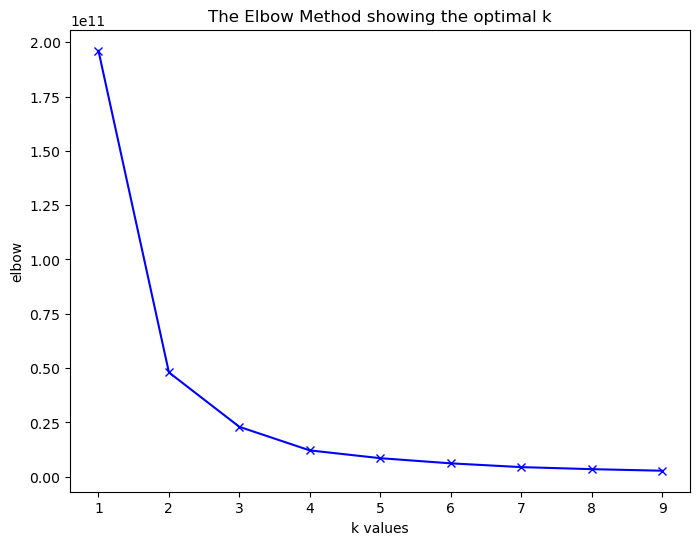

In [67]:
#plotting Elbow method vs values of K
plt.figure(figsize = (8,6))
plt.plot(K, elbowinsurance, 'bx-')
plt.xlabel('k values')
plt.ylabel ('elbow')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [68]:
#optimal values of k
print ("As per the graph above, the optimal value of k is 2")

As per the graph above, the optimal value of k is 2


In [69]:
#training meanshift model for bandwidth 90-100
clusters = []
I = range(5,15)
for i in I:
    mean_shift = MeanShift(bandwidth = i)
    mean_shift.fit(selected_features)
    clusters = mean_shift.predict(selected_features)
    print(clusters[0:5])

#return clusters

[0 0 3 5 5]
[0 0 3 3 3]
[0 0 2 2 2]
[0 0 0 2 2]
[0 0 0 2 2]
[1 1 1 2 2]
[0 0 0 0 0]
[0 0 0 0 0]
[1 1 1 1 1]
[0 0 0 0 0]


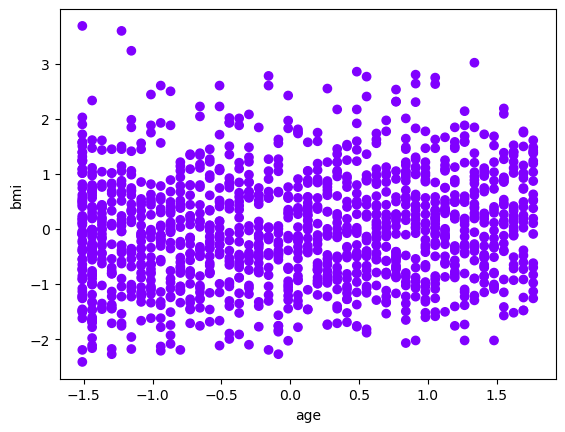

In [70]:
#DBscan of age against BMI

dbscan = DBSCAN(eps=9.25, min_samples = 3)
clusters = dbscan.fit_predict(selected_features)

# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 2], c=clusters, cmap="rainbow")

plt.xlabel('age')
plt.ylabel('bmi')
plt.show()

In [71]:
df = pd.read_csv('data-breast cancer.csv')

df.head()

df.dropna()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32


In [72]:
#dropping columns with very low correlation and null values
df.drop(df.columns[[0,4,7,8,9,10,11,13,32]], axis =1, inplace = True)
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'area_mean',
       'smoothness_mean', 'radius_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [73]:
#encoding diagnosis column as it contains string values M for Malignant and B for Benign
enc = OrdinalEncoder()


df[['diagnosis']] = enc.fit_transform(df[['diagnosis']])

In [74]:
#selecting features
selected_features1 = df[['radius_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst' ]]
display(selected_features1)

,radius_mean,area_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
0,17.99,1001.0,25.380,184.60,2019.0,0.7119,0.2654
1,20.57,1326.0,24.990,158.80,1956.0,0.2416,0.1860
2,19.69,1203.0,23.570,152.50,1709.0,0.4504,0.2430
3,11.42,386.1,14.910,98.87,567.7,0.6869,0.2575
4,20.29,1297.0,22.540,152.20,1575.0,0.4000,0.1625
...,...,...,...,...,...,...,...
564,21.56,1479.0,25.450,166.10,2027.0,0.4107,0.2216
565,20.13,1261.0,23.690,155.00,1731.0,0.3215,0.1628
566,16.60,858.1,18.980,126.70,1124.0,0.3403,0.1418
567,20.60,1265.0,25.740,184.60,1821.0,0.9387,0.2650


In [75]:
#selecting and scaling X variable (selected features)
scaler = StandardScaler()

X1 = scaler.fit_transform(selected_features1)

In [76]:
#implementing Elbow method in Python
elbow = []
k = range(1,10)
for i in K:
    kmeanModel = KMeans(n_clusters = i)
    kmeanModel.fit(df)
    elbow.append(kmeanModel.inertia_)

C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

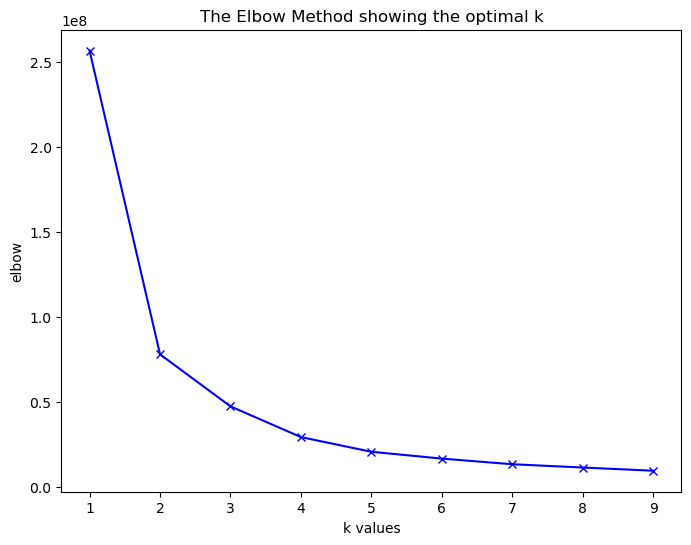

In [77]:
#plotting Elbow method vs values of K
plt.figure(figsize = (8,6))
plt.plot(K, elbow, 'bx-')
plt.xlabel('k values')
plt.ylabel ('elbow')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [78]:
#optimal values of K
print("as per above plot, the optimals value of k is 2")

as per above plot, the optimals value of k is 2


In [79]:
#training Meanshift model for bandwidth from 90 - 100
clusters1 = []
M = range(90,100)
for m in M:
    mean_shift1 = MeanShift(bandwidth = m)
    mean_shift1.fit(selected_features1)
    clusters1 = mean_shift1.predict(selected_features1)
    print(clusters1[0:5])

#return clusters

[41 13 10  0 35]
[38 11  9  0 32]
[38 12 10  0 32]
[36 10  8  0 30]
[37 11  5  0 31]
[37 11  5  0 31]
[36 11  6  0 31]
[35 10  6  0 30]
[36 11  6  0 20]
[33  9  5  0 17]


In [80]:
#getting shape of selected_features
selected_features1.shape

(569, 7)

In [81]:
#getting shape of cluster_centers1 to obtain number of clusters
cluster_centers1 = mean_shift1.cluster_centers_

cluster_centers1.shape

(36, 7)

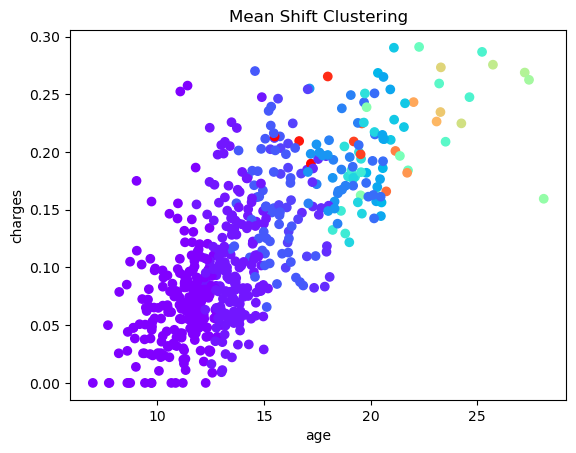

In [82]:
#Mean shift clustering


plt.scatter(selected_features1.iloc[:, 0], selected_features1.iloc[:, 6], c = clusters1, cmap = "rainbow")

plt.title('Mean Shift Clustering')
plt.xlabel('age')
plt.ylabel('charges')

plt.show()

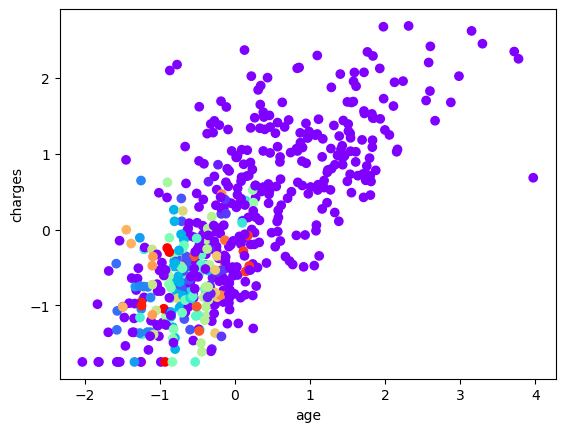

In [83]:
#DBSCAN plotting 'age' against 'charges'

dbscan1 = DBSCAN(eps=9.25, min_samples = 3)
clusters1 = dbscan.fit_predict(selected_features1)

# plot the cluster assignments
plt.scatter(X1[:, 0], X1[:, 6], c=clusters1, cmap="rainbow")

plt.xlabel('age')
plt.ylabel('charges')
plt.show()